
# A case study on Clustering


A supermarket called K-mart wants to analyse its customers. It wants to understand its customers, their spends, their marketing campaigns and make it easier for them to take business decisions and modify products and strategies accordingly.

This process is called customer personality analysis. It helps businesses make decisions like instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

When analysing customers, its also valuable to cluster the customers into meaningful clusters so that we can make our decisions accordingly and make customer cluster specific decisions. We want to be in a position where we can try different strategies for different customer clusters.
You are the official Data scientist of the K-mart and are given the task to do the customer personality analysis and also do the clustering of the customers.

**_People_**

**ID**: Customer's unique identifier

**Year_Birth:** Customer's birth year

**Education:** Customer's education level

**Marital_Status:** Customer's marital status

**Income:** Customer's yearly household income

**Kidhome:** Number of children in customer's household

**Teenhome:** Number of teenagers in customer's household

**Dt_Customer:** Date of customer's enrollment with the company

**Recency:** Number of days since customer's last purchase

**Complain:** 1 if the customer complained in the last 2 years, 0 otherwise

**_Products_**

**MntWines:** Amount spent on wine in last 2 years

**MntFruits:** Amount spent on fruits in last 2 years

**MntMeatProducts:** Amount spent on meat in last 2 years

**MntFishProducts:** Amount spent on fish in last 2 years

**MntSweetProducts:** Amount spent on sweets in last 2 years

**MntGoldProds:** Amount spent on gold in last 2 years

_Promotion_

**NumDealsPurchases:** Number of purchases made with a discount

**AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise

**AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

**AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

**AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise

**AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise

**Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise

**_Place_**

**NumWebPurchases:** Number of purchases made through the company’s website

**NumCatalogPurchases:** Number of purchases made using a catalogue

**NumStorePurchases:** Number of purchases made directly in stores

**NumWebVisitsMonth:** Number of visits to company’s website in the last month

In [1]:
# IMPORT THE LIBRARIES....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the data
df=pd.read_csv(r"C:\Users\mukhe\OneDrive\Desktop\ML&DL\CaseStudies\Clustering\marketing_campaign.csv",sep='\t')
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0


In [5]:
# Understand the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# Lets check out this dataset's shape
df.shape

(2240, 29)

Oops! 29 columns that's a lot of columns

# Exploratory Data Analysis

We are going to do the customer personality analysis in this section

## Handling nulls and datatypes

In [11]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

So we could see income as the column which has missing and about 1% of the data is missing

In [10]:
# Replace the missing values with mean

df['Income'].fillna(df['Income'].mean(),inplace=True)

In [14]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'],dayfirst=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

## Analysing People

Lets look at the kids data of customers.
When it comes to kids, 2 possible columns exist in our data.
Teenhome and Kidhome. We can look at them and possibly combine them to make a new column instead of 2.

In [19]:
df['Children']=df['Teenhome']+df['Kidhome']

In [20]:
df.drop(['Teenhome','Kidhome'],inplace=True,axis=1)

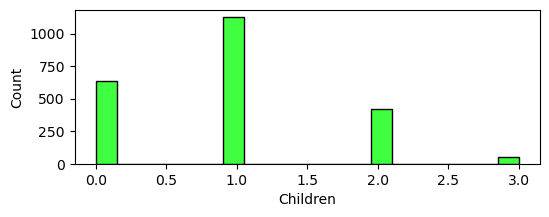

In [30]:
# df.groupby('Children')[['ID']].count()
plt.figure(figsize=(6,2))
sns.histplot(x=df['Children'],color='lime')
plt.show()

Interestingly most people have just 1 kid

## Analysing Products

So products data is all about how much people spent on each unique category of products.
We can either look at the amount spent at each of them or simply get a bigger picture by combining them all.

Individually looking them all may not give us enough insight because those are just numbers, we can combine them and analyse them like a continous variable.

In [32]:
products=[]
for col in df.columns:
    if 'Mnt' in col:
        products.append(col)

In [33]:
products

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

In [37]:
df['Products']=df[products].sum(axis=1)

In [39]:
df.drop(products,axis=1,inplace=True)

In [40]:
df.shape

(2240, 23)

## Analysing Promotions

We have a number of accepted columns in the data, which say that if the customer accepted the offer in a given campaign or not. 
Lets combine all the accepted columns and analyse them.

We will basically analyse if customer accepted the campain at all or not. Thats the bottom line.

In [41]:
camps=[]
for cols in df.columns:
    if 'Accepted' in cols or 'Response' in cols:
       camps.append(cols) 

In [44]:
df['Campaigns']=df[camps].sum(axis=1)

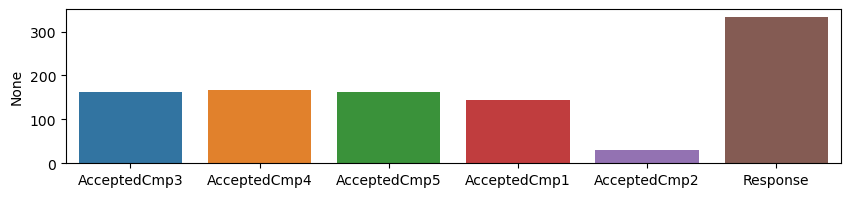

In [50]:
plt.figure(figsize=(10,2))
sns.barplot(x=camps,y=df[camps].sum(),hue=camps)
plt.show()

In [51]:
df.drop(camps,axis=1,inplace=True)

In [52]:
df.shape

(2240, 18)

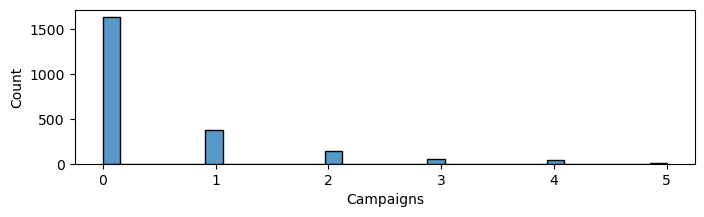

In [53]:
plt.figure(figsize=(8,2))
sns.histplot(x=df['Campaigns'])
plt.show()

So the value 0 takes the most count, which means most of our campaigns failed.

For purchases, we can do a similar analysis we did above.
But do we plot a hist or a box plot? Why don't you try to figure out?

## Analysing Purchases

In [ ]:
# A pie plot to show the total purchases done from each platform

# Data Pre-processing

In [212]:
# ENCODING

In [9]:
# also most models cant accept the date type, so we just drop that column it doesnt add value too

## Data Scaling

# Dimensionality reduction

# Clustering

## K-means

### Elbow method

## Implementing K-means in Python

### Visualising k-means results